# Consumer Household Expenditure
### Data from the consumer Expenditure Survey: https://download.bls.gov/pub/time.series/cx/

In [261]:
import pandas as pd
import matplotlib.pyplot as plt

In [262]:
# Cleaner style
plt.style.use("bmh")

# Bigger fonts and plots for readability
plt.rcParams["figure.facecolor"] = 'w'
plt.rcParams['xtick.labelsize'] = "large" # Default is medium
plt.rcParams['ytick.labelsize'] = "large" # Default is medium
plt.rcParams['axes.labelsize'] = "x-large" # Default is large
plt.rcParams['figure.titlesize'] = "xx-large" # Default is large
plt.rcParams["figure.figsize"] = [10, 5] # Default is [6.4, 4.8]
plt.rcParams["axes.titleweight"] = "bold" # Default is normal

In [279]:
# Read in the raw tab-seperated data
data = pd.read_csv("cx.data", sep="\t", skipinitialspace=True)

In [280]:
# Remove whitespace from column names
data.columns = [col.strip() for col in data.columns]

# Only interested in these specific columns
columns = ["series_id", "year", "value"]
data = data[columns]

# Remove whitespace from series_id
data["series_id"] = data["series_id"].apply(lambda x: x.strip())

# Only look at recent data
data = data[data["year"] == 2021]

In [287]:
# Group into characteristics https://download.bls.gov/pub/time.series/cx/cx.characteristics
data["characteristic"] = data["series_id"].apply(lambda x: x[-3:-1])

### Our analysis is generally conditioned on income, so we focus on the income quantile demographics_code
##### LB01: Quintiles of income before taxes.
##### See: https://download.bls.gov/pub/time.series/cx/cx.demographics for demographic codes

In [288]:
demographic_code = "LB01"

In [289]:
# Filter to only the demographic-specific rows we are interested in
filtered_rows = data["series_id"].apply(lambda id: demographic_code in id)
data = data[filtered_rows]

### Expenses of interest
##### We are only interested in particular expenses, see: https://download.bls.gov/pub/time.series/cx/cx.subcategory

In [339]:
# For comparing across the types, keep after tax incomes
incomes = data[data["series_id"].apply(lambda id: "INCAFTTX" in id)]
incomes = incomes.set_index("characteristic").to_dict()["value"]

In [340]:
expense_types = ["EDUCATN", "ENTRTAIN", "FOODTOTL", "HEALTH", "HOUSING", "INSPENSN", "TOTALEXP",]

In [341]:
# Filter to only the demographic-specific rows we are interested in
expense_rows = data["series_id"].apply(lambda id: any(expense in id for expense in expense_types))
expenses = data[expense_rows]

In [342]:
characteristic_labels = {
    "01": "Overall",
    "02": "Lowest 20 percent income quintile",
    "03": "Second 20 percent income quintile",
    "04": "Third 20 percent income quintile",
    "05": "Fourth 20 percent income quintile",
    "06": "Highest 20 percent income quintile",
}

Overall [66928.]
Lowest 20 percent income quintile [30869.]
Second 20 percent income quintile [43918.]
Third 20 percent income quintile [55914.]
Fourth 20 percent income quintile [75284.]
Highest 20 percent income quintile [128213.]


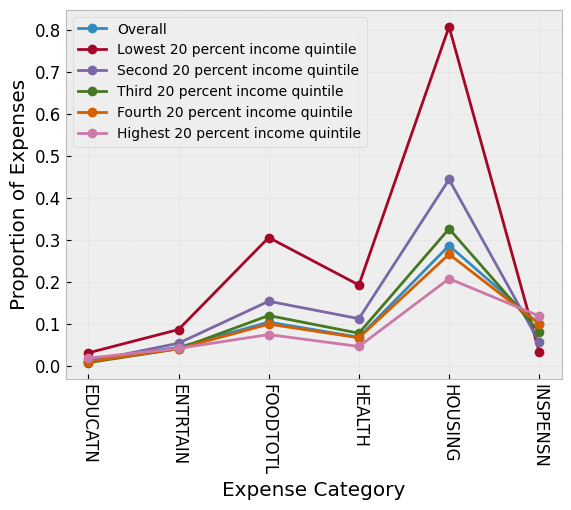

In [344]:
for characteristic, df in expenses.groupby("characteristic"):

    total_row = df[df["series_id"].apply(lambda x: "TOTALEXP" in x)]["value"].values
    other_rows = df[df["series_id"].apply(lambda x: "TOTALEXP" not in x)]

    
    income = incomes[characteristic]
    
    #normalised = other_rows["value"].values / total_row
    normalised = other_rows["value"].values / income

    

    names = other_rows["series_id"].apply(lambda x: x[3:-7])

    print(characteristic_labels[characteristic],total_row)

    plt.plot(names, normalised, marker="o", label=characteristic_labels[characteristic])


plt.ylabel("Proportion of Expenses")
plt.xlabel("Expense Category")
plt.xticks(rotation=-90)
plt.grid(alpha=0.25)
plt.legend()

plt.savefig("plots/spend_income_normalised.pdf", bbox_inches="tight")
plt.show()